<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [2]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-3-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [5]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [7]:
data

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [71]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X1 = pd.read_csv(text2)

In [9]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [15]:
Y = data['Class'].to_numpy()
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [31]:
# students get this 
transform = preprocessing.StandardScaler()
transform.fit(X)

X_scaled = transform.transform(X)
X = X_scaled

In [32]:
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, Y_train.shape)
print("Test shape:", X_test.shape, Y_test.shape)


Train shape: (72, 83) (72,)
Test shape: (18, 83) (18,)


we can see we only have 18 test samples.


In [35]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [38]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [43]:

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression())
])





parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}



param_grid = [
    # lbfgs supports only l2 (or none, but 'none' rarely helps)
    {
        "logreg__solver": ["lbfgs"],
        "logreg__penalty": ["l2"],
        "logreg__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "logreg__max_iter": [1000]
    },
    # liblinear supports l1 and l2
    {
        "logreg__solver": ["liblinear"],
        "logreg__penalty": ["l1", "l2"],
        "logreg__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "logreg__max_iter": [1000]
    },
    # saga supports l1, l2, and elasticnet (with l1_ratio)
    {
        "logreg__solver": ["saga"],
        "logreg__penalty": ["elasticnet"],
        "logreg__l1_ratio": [0.0, 0.5, 1.0],
        "logreg__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "logreg__max_iter": [1000]
    },
    {
        "logreg__solver": ["saga"],
        "logreg__penalty": ["l1", "l2"],
        "logreg__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "logreg__max_iter": [1000]
    }
]


logreg_cv = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=10,
    scoring="accuracy",   # change to appropriate metric if needed
    n_jobs=-1,
    refit=True
)


In [44]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [46]:

# 1) Make sure you created the object
# logreg_cv = GridSearchCV(...)

# 2) Fit MUST run successfully
logreg_cv.fit(X_train, Y_train)  # <— ensure this cell ran and didn’t error

# 3) Now these attributes should exist:
print("Best params:", logreg_cv.best_params_)
print("Best CV score:", logreg_cv.best_score_)

# best_estimator_ exists only if refit=True (default)
print("Best estimator:", logreg_cv.best_estimator_)


/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/pytho

Best params: {'logreg__C': 0.1, 'logreg__l1_ratio': 1.0, 'logreg__max_iter': 1000, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}
Best CV score: 0.8339285714285716
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.1, l1_ratio=1.0, max_iter=1000,
                                    penalty='elasticnet', solver='saga'))])


In [47]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'logreg__C': 0.1, 'logreg__l1_ratio': 1.0, 'logreg__max_iter': 1000, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}
accuracy : 0.8339285714285716


In [49]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression())
])

param_grid = [
    {
        "logreg__solver": ["lbfgs"],
        "logreg__penalty": ["l2"],
        "logreg__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "logreg__max_iter": [1000]
    },
    {
        "logreg__solver": ["liblinear"],
        "logreg__penalty": ["l1", "l2"],
        "logreg__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "logreg__max_iter": [1000]
    },
    {
        "logreg__solver": ["saga"],
        "logreg__penalty": ["elasticnet"],
        "logreg__l1_ratio": [0.0, 0.5, 1.0],
        "logreg__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "logreg__max_iter": [1000]
    },
    {
        "logreg__solver": ["saga"],
        "logreg__penalty": ["l1", "l2"],
        "logreg__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "logreg__max_iter": [1000]
    }
]

logreg_cv = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=10,
    scoring="neg_log_loss",   # optimize log loss (lower is better → higher neg_log_loss)
    n_jobs=-1,
    refit="neg_log_loss"      # refit the best (lowest log loss) model on all training data
)

logreg_cv.fit(X_train, Y_train)

print("Best params (by log loss):", logreg_cv.best_params_)
print("Best CV log loss:", -logreg_cv.best_score_)  # invert the sign

# Evaluate log loss on the held-out test set
y_proba_test = logreg_cv.predict_proba(X_test)
# Binary: log_loss expects prob of the positive class; passing full matrix works for binary & multiclass
test_logloss = log_loss(Y_test, y_proba_test)
print("Test log loss:", test_logloss)


/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/pytho

Best params (by log loss): {'logreg__C': 0.1, 'logreg__l1_ratio': 0.5, 'logreg__max_iter': 1000, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}
Best CV log loss: 0.46426501265241377
Test log loss: 0.31770111722310457


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [54]:

# Accuracy on the test set
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: -0.31770111722310457


Lets look at the confusion matrix:


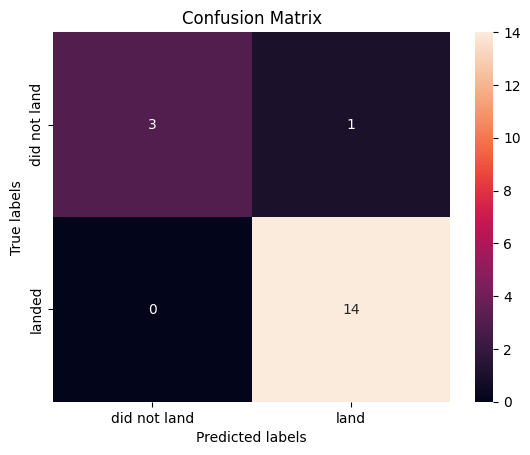

In [55]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [56]:

import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Your parameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

svm = SVC(probability=True)  # probability=True if you'll compute log loss or need predict_proba

svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10,
    scoring='accuracy',   # change if you prefer another metric (e.g., 'roc_auc', 'neg_log_loss')
    n_jobs=-1,
    refit=True
)

svm_cv.fit(X_train, Y_train)

print("Best params:", svm_cv.best_params_)
print("Best CV accuracy:", svm_cv.best_score_)
print("Test accuracy:", svm_cv.score(X_test, Y_test))


Best params: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best CV accuracy: 0.832142857142857
Test accuracy: 0.8888888888888888


In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

Best kernel: sigmoid
Best C: 1.0
Best gamma: 0.03162277660168379
Best mean CV accuracy: 0.8321


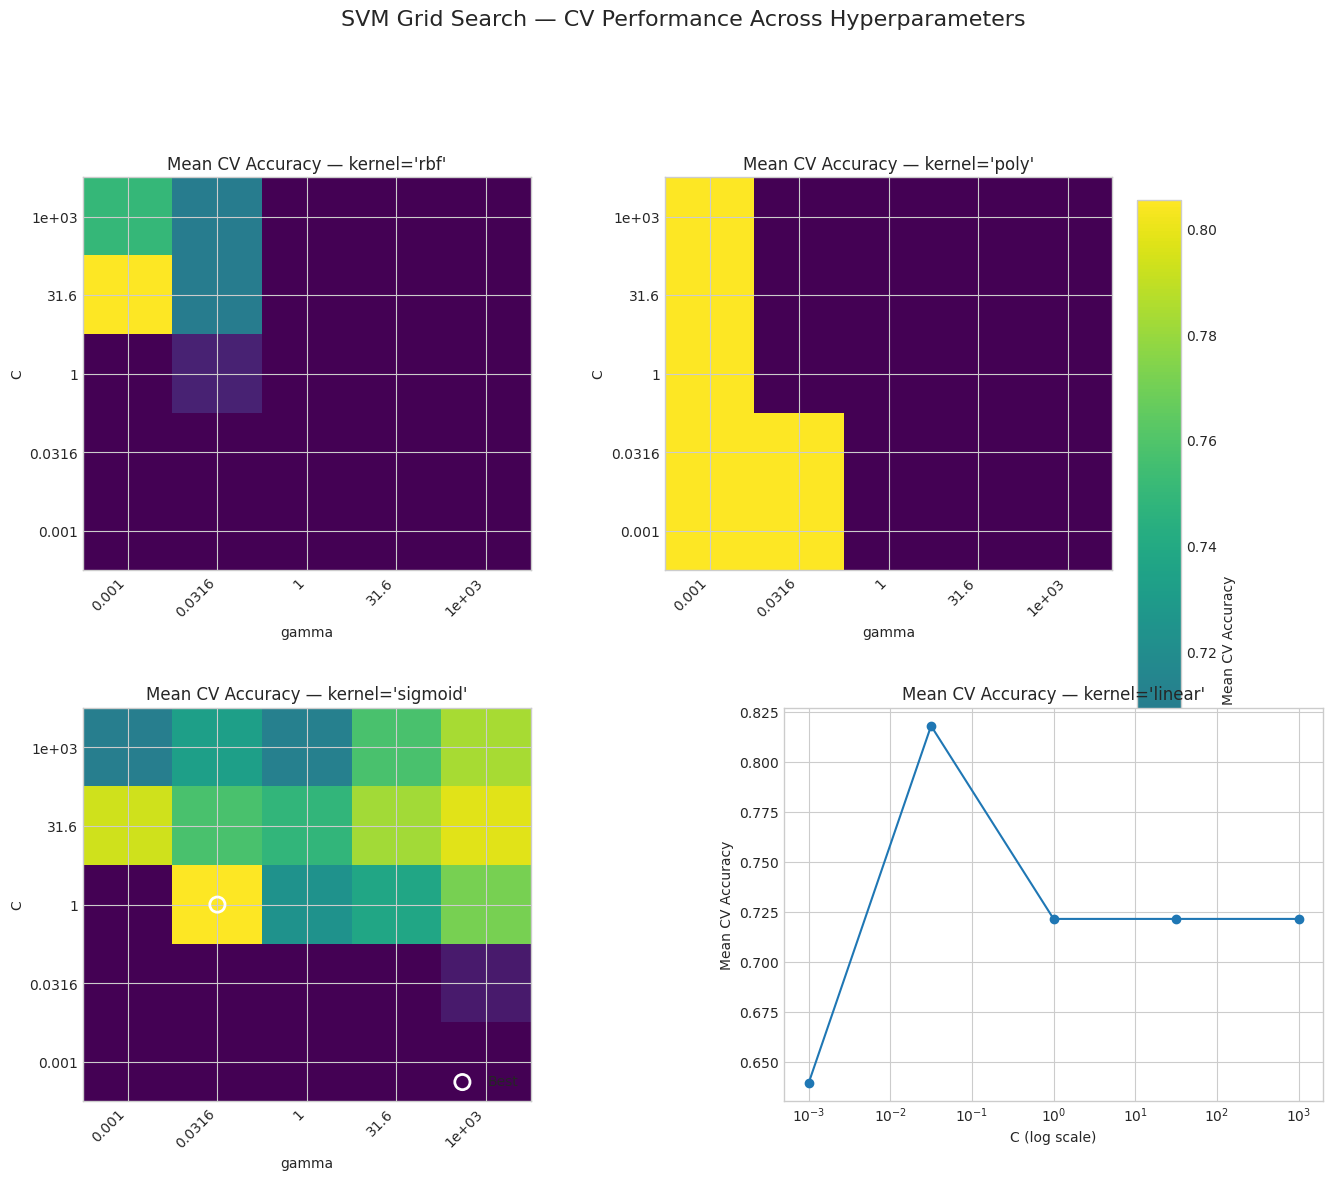

In [60]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cvres = pd.DataFrame(svm_cv.cv_results_)

# --- Detect parameter column names automatically (direct SVC vs Pipeline) ---
def find_param_col(base):
    candidates = [f"param_{base}", f"param_svm__{base}"]
    for c in candidates:
        if c in cvres.columns:
            return c
    for c in cvres.columns:
        if c.startswith("param_") and c.endswith(base):
            return c
    raise KeyError(f"Could not find a column for parameter '{base}'. "
                   f"Available param columns: {[c for c in cvres.columns if c.startswith('param_')]}")

col_kernel = find_param_col("kernel")
col_C      = find_param_col("C")
col_gamma  = find_param_col("gamma")

# --- Parse into convenient columns ---
cvres["kernel"] = cvres[col_kernel].astype(str)
cvres["C"]      = pd.to_numeric(cvres[col_C])
cvres["gamma"]  = pd.to_numeric(cvres[col_gamma], errors="coerce")  # NaN for linear

# Best configuration
best_idx    = svm_cv.best_index_
best_row    = cvres.loc[best_idx]
best_kernel = best_row["kernel"]
best_C      = float(best_row["C"])
best_gamma  = best_row["gamma"] if not pd.isna(best_row["gamma"]) else None
best_score  = cvres.loc[best_idx, "mean_test_score"]

print(f"Best kernel: {best_kernel}")
print(f"Best C: {best_C}")
print(f"Best gamma: {best_gamma}")
print(f"Best mean CV accuracy: {best_score:.4f}")

# Axes values
C_values     = np.sort(cvres["C"].unique())
gamma_values = np.sort(cvres["gamma"].dropna().unique())

# --- Safe style selection ---
available = plt.style.available
preferred_styles = ["seaborn-whitegrid", "seaborn", "ggplot", "default"]
for st in preferred_styles:
    if st in available or st == "default":
        try:
            plt.style.use(st)
            break
        except Exception:
            continue

# === Heatmaps for kernels that use gamma ===
kernels_with_gamma = ["rbf", "poly", "sigmoid"]

fig = plt.figure(figsize=(16, 12))
grid = plt.GridSpec(2, 2, wspace=0.3, hspace=0.35)

def plot_heatmap(ax, kernel_name):
    dfk = cvres[cvres["kernel"] == kernel_name]
    if dfk.empty:
        ax.set_title(f"{kernel_name} (no results)")
        ax.axis("off")
        return None

    pivot = dfk.pivot_table(index="C", columns="gamma",
                            values="mean_test_score", aggfunc="mean").reindex(
        index=C_values, columns=gamma_values
    )

    im = ax.imshow(pivot.values, origin="lower", aspect="auto",
                   cmap="viridis",
                   vmin=np.nanmin(pivot.values),
                   vmax=np.nanmax(pivot.values))

    ax.set_xticks(range(len(gamma_values)))
    ax.set_xticklabels([f"{g:.3g}" for g in gamma_values], rotation=45, ha="right")
    ax.set_yticks(range(len(C_values)))
    ax.set_yticklabels([f"{c:.3g}" for c in C_values])
    ax.set_xlabel("gamma")
    ax.set_ylabel("C")
    ax.set_title(f"Mean CV Accuracy — kernel='{kernel_name}'")

    # Mark the best combination
    if best_kernel == kernel_name and best_gamma is not None:
        try:
            y_idx = list(C_values).index(best_C)
            x_idx = list(gamma_values).index(best_gamma)
            ax.scatter(x_idx, y_idx, s=120, edgecolor="white",
                       facecolor="none", linewidth=2, label="Best")
            ax.legend(loc="lower right")
        except ValueError:
            pass
    return im

ax_rbf = fig.add_subplot(grid[0, 0]); im_rbf = plot_heatmap(ax_rbf, "rbf")
ax_poly = fig.add_subplot(grid[0, 1]); im_poly = plot_heatmap(ax_poly, "poly")
ax_sig  = fig.add_subplot(grid[1, 0]); im_sig  = plot_heatmap(ax_sig,  "sigmoid")

ims = [im for im in [im_rbf, im_poly, im_sig] if im is not None]
if ims:
    cbar = fig.colorbar(ims[0], ax=[ax_rbf, ax_poly, ax_sig], shrink=0.95, pad=0.02)
    cbar.set_label("Mean CV Accuracy")

# === Line plot for linear kernel (gamma ignored) ===
ax_lin = fig.add_subplot(grid[1, 1])
df_lin = cvres[cvres["kernel"] == "linear"]
if not df_lin.empty:
    lin_scores = df_lin.groupby("C")["mean_test_score"].mean().reindex(C_values)
    ax_lin.plot(C_values, lin_scores, marker="o")
    ax_lin.set_xscale("log")
    ax_lin.set_xlabel("C (log scale)")
    ax_lin.set_ylabel("Mean CV Accuracy")
    ax_lin.set_title("Mean CV Accuracy — kernel='linear'")
    if best_kernel == "linear":
        ax_lin.scatter([best_C], [best_score], s=140, edgecolor="red",
                       facecolor="none", linewidth=2, label="Best")
        ax_lin.legend()
else:
    ax_lin.set_title("linear (no results)")
    ax_lin.axis("off")

fig.suptitle("SVM Grid Search — CV Performance Across Hyperparameters", fontsize=16, y=1.02)
plt.show()


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


We can plot the confusion matrix


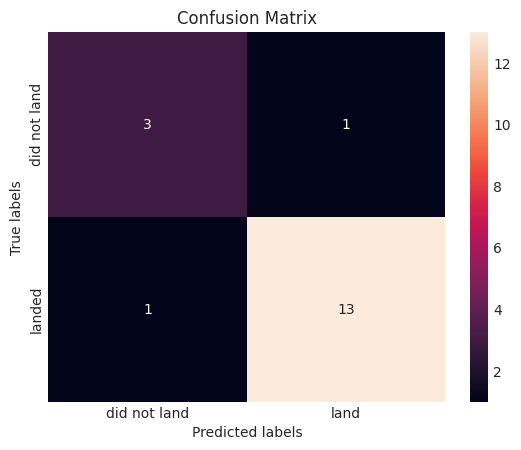

In [61]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [65]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 1) Create the decision tree object
tree = DecisionTreeClassifier(random_state=42)

# 2) Define a suitable parameter grid for decision trees
parameters = {
    "criterion": ["gini", "entropy", "log_loss"],  # 'log_loss' requires sklearn >= 1.1
    "max_depth": [None, 3, 5, 7, 9, 12],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"],        # None=use all features
    "class_weight": [None, "balanced"],            # try balanced for imbalanced data
    "splitter": ["best"]                           # or 'random' if you want randomized splits
}

# 3) Create the GridSearchCV object
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,
    scoring="accuracy",    # change to 'balanced_accuracy', 'f1', etc., if more suitable
    n_jobs=-1,
    refit=True
)

# 4) Fit to the training data
tree_cv.fit(X_train, Y_train)

# 5) Inspect results
print("Best params:", tree_cv.best_params_)
print("Best CV accuracy:", tree_cv.best_score_)
print("Test accuracy:", tree_cv.score(X_test, Y_test))


Best params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best CV accuracy: 0.8875
Test accuracy: 0.8888888888888888


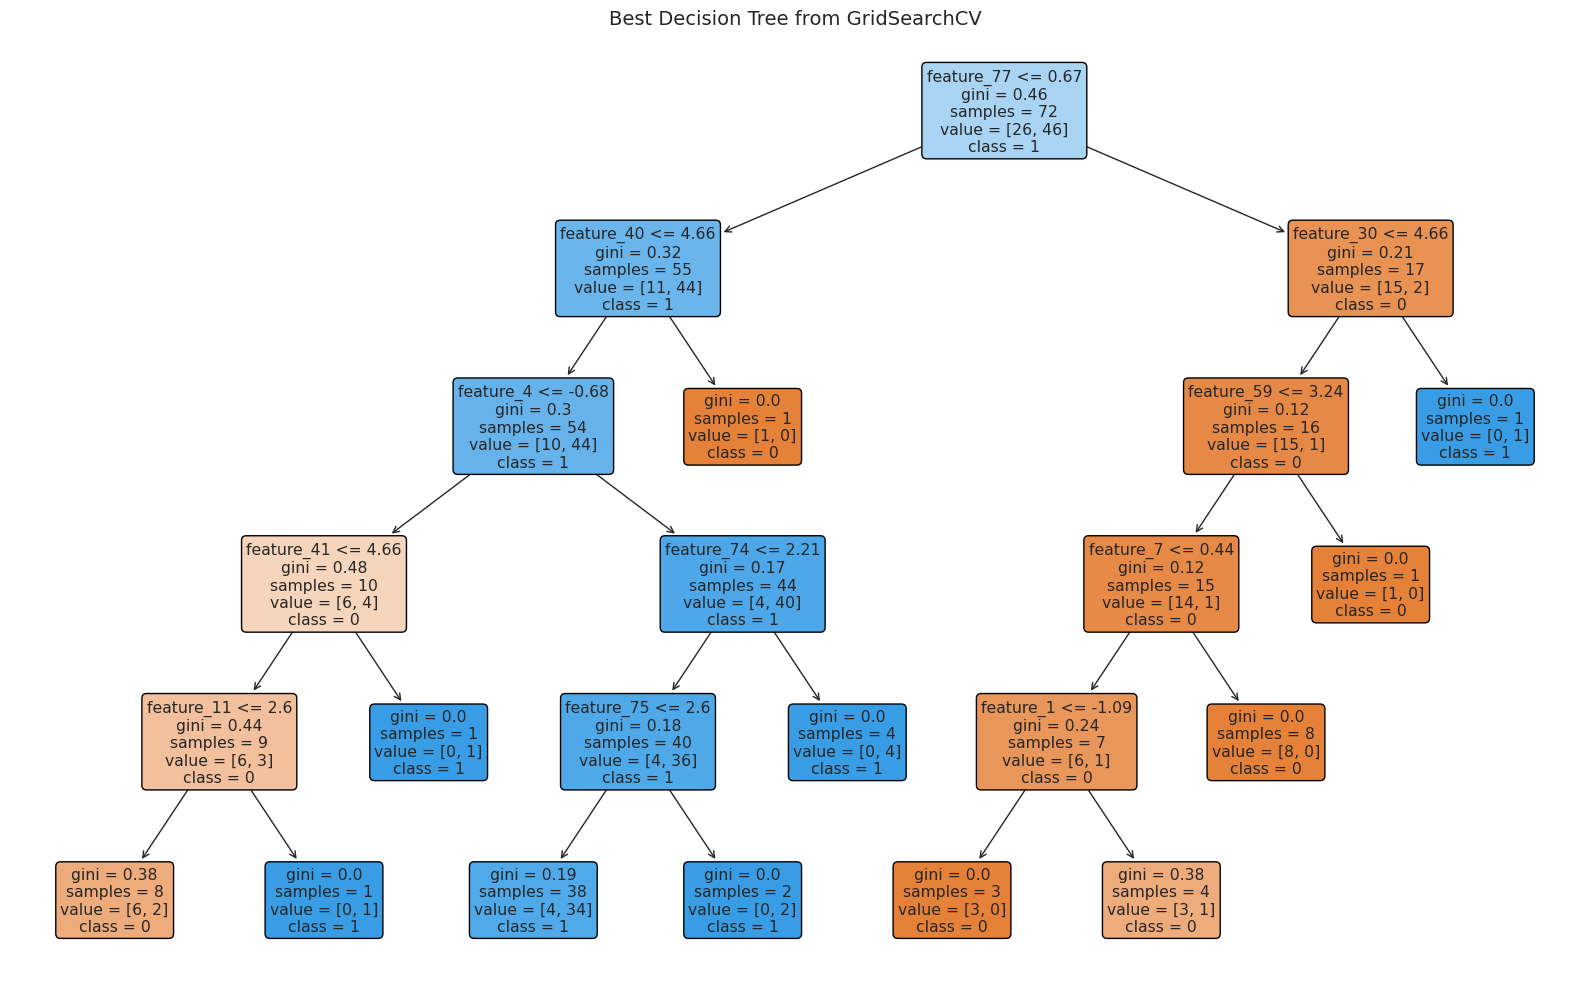

Saved figure as best_decision_tree.png


In [66]:

from sklearn import tree as treeviz
import matplotlib.pyplot as plt
import numpy as np

# Get the best tree from GridSearchCV
best_tree = tree_cv.best_estimator_

# Feature names (if X_train is a DataFrame). Otherwise, create generic names.
if hasattr(X_train, "columns"):
    feature_names = list(X_train.columns)
else:
    feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]

# Class names for labeling (works for binary or multiclass)
# If Y_train is numeric labels, this will label classes by their values.
class_values = np.unique(Y_train)
class_names = [str(c) for c in class_values]

# Optional: limit displayed depth for readability (especially if the best tree is deep)
# Set to None to show the full tree
display_max_depth = None  # e.g., try 3 or 4 if the plot is too crowded

plt.figure(figsize=(16, 10))
treeviz.plot_tree(
    best_tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    proportion=False,       # set True to show proportions in nodes
    precision=2,
    max_depth=display_max_depth
)
plt.title("Best Decision Tree from GridSearchCV", fontsize=14)
plt.tight_layout()
plt.show()

# Save to file (optional)
plt.figure(figsize=(16, 10))
treeviz.plot_tree(
    best_tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    precision=2,
    max_depth=display_max_depth
)
plt.tight_layout()
plt.savefig("best_decision_tree.png", dpi=200)
plt.close()

print("Saved figure as best_decision_tree.png")


In [101]:


best_tree = tree_cv.best_estimator_
tree_ = best_tree.tree_

root_feature_index = tree_.feature[0]      # feature index used at root
root_threshold     = tree_.threshold[0]    # threshold at root split

print("Root feature index:", root_feature_index)
print("Root threshold:", root_threshold)

if root_feature_index == 77:
    print(f"Top split: feature_77 <= {root_threshold:.6f} (left) vs > {root_threshold:.6f} (right)")
else:
    print(f"Note: top split is feature_{root_feature_index}, not feature_77.")


Root feature index: 77
Root threshold: 0.6681531369686127
Top split: feature_77 <= 0.668153 (left) vs > 0.668153 (right)


In [109]:

# Check column name and type
print(X1.columns[77])  # if you know it's the 78th column
print(X1[X1.columns[77]].dtype)

# Summary statistics
print(X1[X1.columns[77]].describe())


GridFins_False
float64
count    90.000000
mean      0.222222
std       0.418069
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: GridFins_False, dtype: float64


In [102]:

tree_ = best_tree.tree_
if tree_.feature[0] == 77:
    thr = tree_.threshold[0]
    print(f"Root condition: feature_77 <= {thr:.6f} (left) vs > {thr:.6f} (right)")
else:
    print("Root split is another feature; feature_77 appears deeper in the tree.")


Root condition: feature_77 <= 0.668153 (left) vs > 0.668153 (right)


In [98]:


pd.reset_option('display.max_rows')

# Show all columns
pd.set_option('display.max_columns', None)

# Show full content of each column (no truncation)
pd.set_option('display.max_colwidth', None)

X1

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.

In [94]:
print(X1.columns[33])

Serial_B1010


In [83]:

value_to_find = 'Serial_B1062'
columns_with_value = data.columns[(data == value_to_find).any()]
print(columns_with_value)


Index([], dtype='object')


In [91]:

positions = np.where(data == "Serial_B1062")
for row, col in zip(*positions):
    print(f"Value found at row {row}, column '{data.columns[col]}'")


In [92]:

first_match = np.where(data == "Serial_B1062")
if len(first_match[0]) > 0:
    row_idx, col_idx = first_match[0][0], first_match[1][0]
    print(f"First match at row {row_idx}, column '{data.columns[col_idx]}'")
else:
    print("Value not found")


Value not found


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


We can plot the confusion matrix


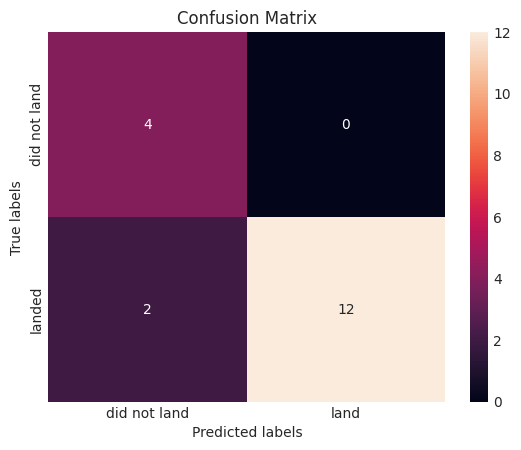

In [110]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [117]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 1) Create KNN object
knn = KNeighborsClassifier()

# 2) Define your parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # p is used for Minkowski distance (p=1: Manhattan, p=2: Euclidean)
}

# 3) Create GridSearchCV object
knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=parameters,
    cv=10,
    scoring='accuracy',  # You can change to 'f1', 'roc_auc', etc.
    n_jobs=-1,
    refit=True
)

# 4) Fit the model
knn_cv.fit(X_train, Y_train)

# 5) Print results
print("Best parameters:", knn_cv.best_params_)
print("Best CV accuracy:", knn_cv.best_score_)
print("Test accuracy:", knn_cv.score(X_test, Y_test))


Best parameters: {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
Best CV accuracy: 0.8446428571428569
Test accuracy: 0.9444444444444444


In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


We can plot the confusion matrix


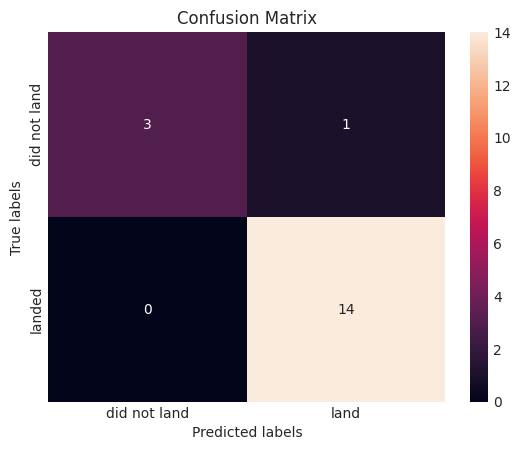

In [118]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
